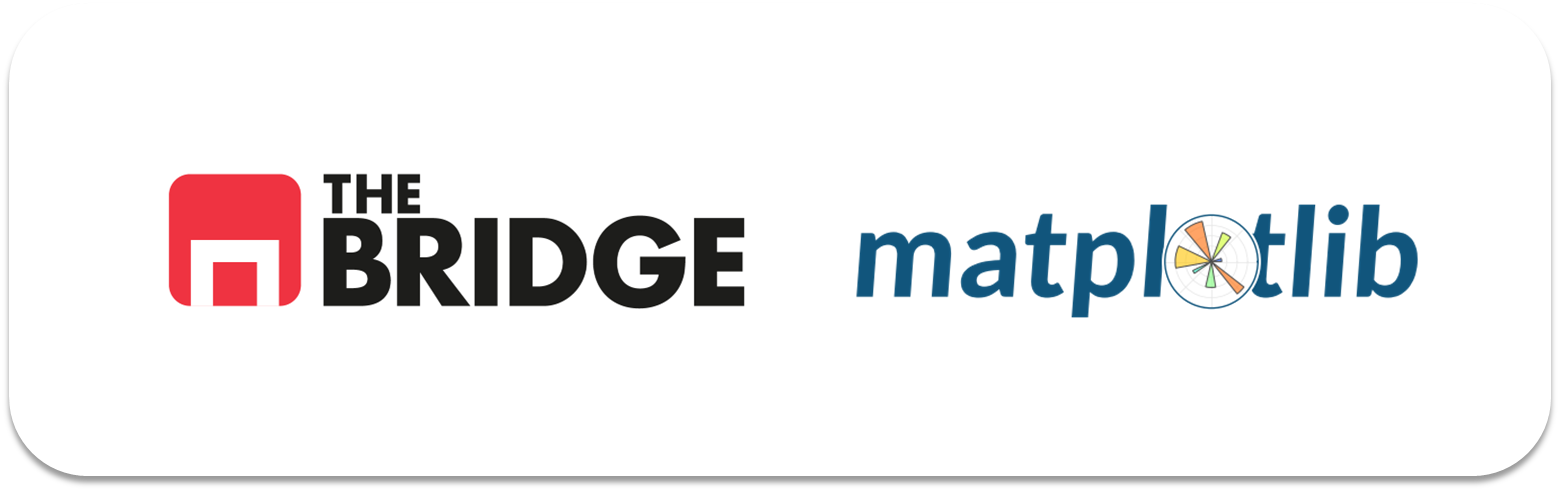

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("/home/adria/Ejercicios/03_Analisis_de_Datos/Sprint_08/Unidad_01/Practica_Obligatoria/data/california_cities.csv")

df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

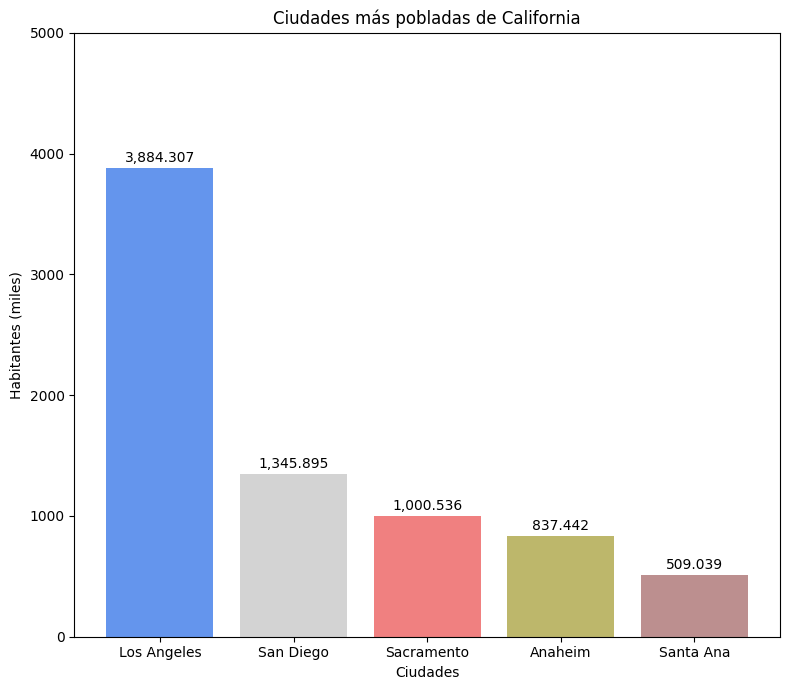

In [3]:
# Preparar datos
top_cities = df.sort_values(by="population_total", ascending=False).head(5).copy()
top_cities["population_miles"] = top_cities["population_total"] / 1000

# Nombres ajustados
city_labels = ["Los Angeles", "San Diego", "Sacramento", "Anaheim", "Santa Ana"]
colors = ['cornflowerblue', 'lightgray', 'lightcoral', 'darkkhaki', 'rosybrown']

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.bar(city_labels, top_cities["population_miles"], color=colors)

# Añadir etiquetas con separadores de miles y un decimal
for bar, value in zip(bars, top_cities["population_miles"]):
    ax.text(bar.get_x() + bar.get_width() / 2,
            value + 50,
            f"{value:,.3f}",
            ha="center", fontsize=10)

# Títulos y etiquetas
ax.set_title("Ciudades más pobladas de California")
ax.set_ylabel("Habitantes (miles)")
ax.set_xlabel("Ciudades")
ax.set_ylim(0, 5000)

plt.tight_layout()
plt.show()

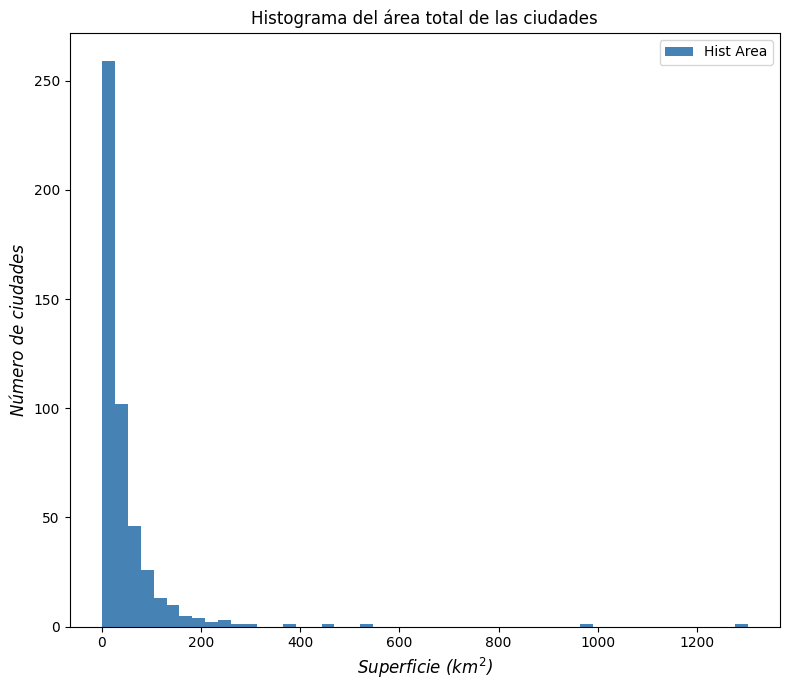

In [4]:
# Crear histograma del área total en km²
fig, ax = plt.subplots(figsize=(8, 7))

# Histograma
ax.hist(df["area_total_km2"], bins=50, color='steelblue', label='Hist Area')

# Etiquetas y estilo
ax.set_title("Histograma del área total de las ciudades")
ax.set_xlabel("Superficie ($km^2$)", fontsize=12, style='italic')
ax.set_ylabel("Número de ciudades", fontsize=12, style='italic')
ax.legend()

plt.tight_layout()
plt.show()


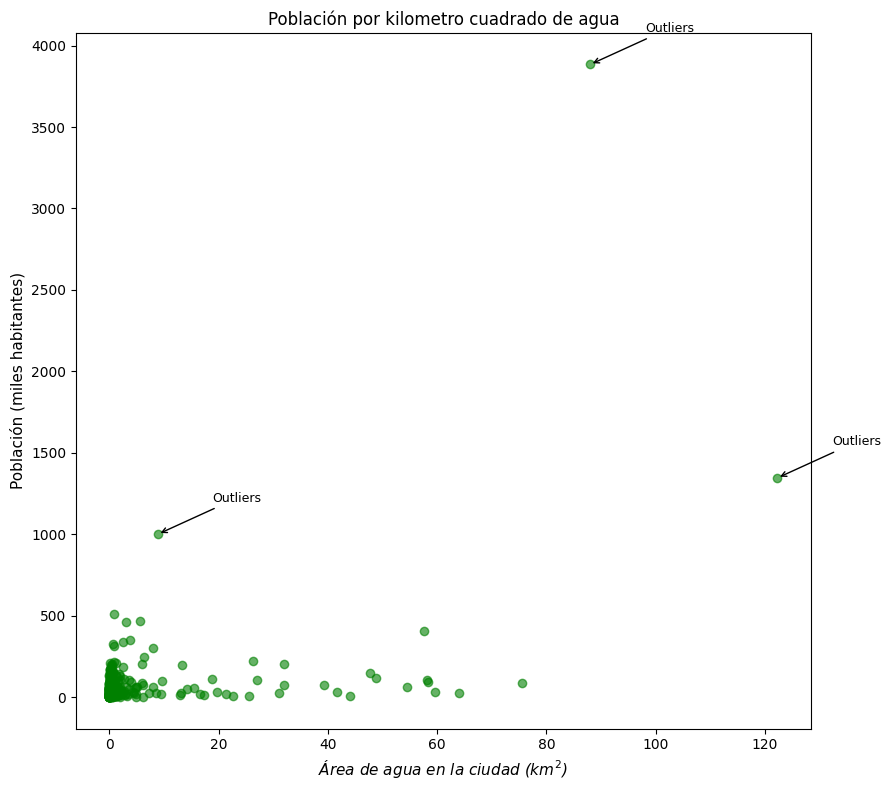

In [5]:
# Preparamos los datos
df_plot = df[df["area_water_km2"] > 0].copy()
df_plot["population_miles"] = df_plot["population_total"] / 1000

# Crear scatter plot con población (miles) vs área de agua
fig, ax = plt.subplots(figsize=(9, 8))
ax.scatter(df_plot["area_water_km2"], df_plot["population_miles"],
           color='green', alpha=0.6)

# Etiquetas
ax.set_title("Población por kilometro cuadrado de agua")
ax.set_xlabel("Área de agua en la ciudad ($km^2$)", fontsize=11, style='italic')
ax.set_ylabel("Población (miles habitantes)", fontsize=11)

# Outliers por población alta
outliers = df_plot[df_plot["population_miles"] > 1000]
for _, row in outliers.iterrows():
    ax.annotate("Outliers",
                xy=(row["area_water_km2"], row["population_miles"]),
                xytext=(row["area_water_km2"] + 10, row["population_miles"] + 200),
                arrowprops=dict(arrowstyle='->'),
                fontsize=9)

plt.tight_layout()
plt.show()

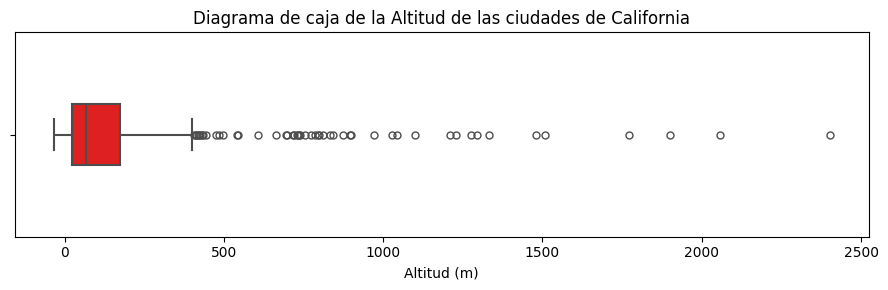

In [6]:
# Crear boxplot de la altitud
fig, ax = plt.subplots(figsize=(9, 3))  # Caja más horizontal

sns.boxplot(x=df["elevation_m"],
            ax=ax,
            color='red',
            width=0.3,
            fliersize=5,
            linewidth=1.5)

# Títulos y etiquetas
ax.set_title("Diagrama de caja de la Altitud de las ciudades de California")
ax.set_xlabel("Altitud (m)")

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Altitud (m)')

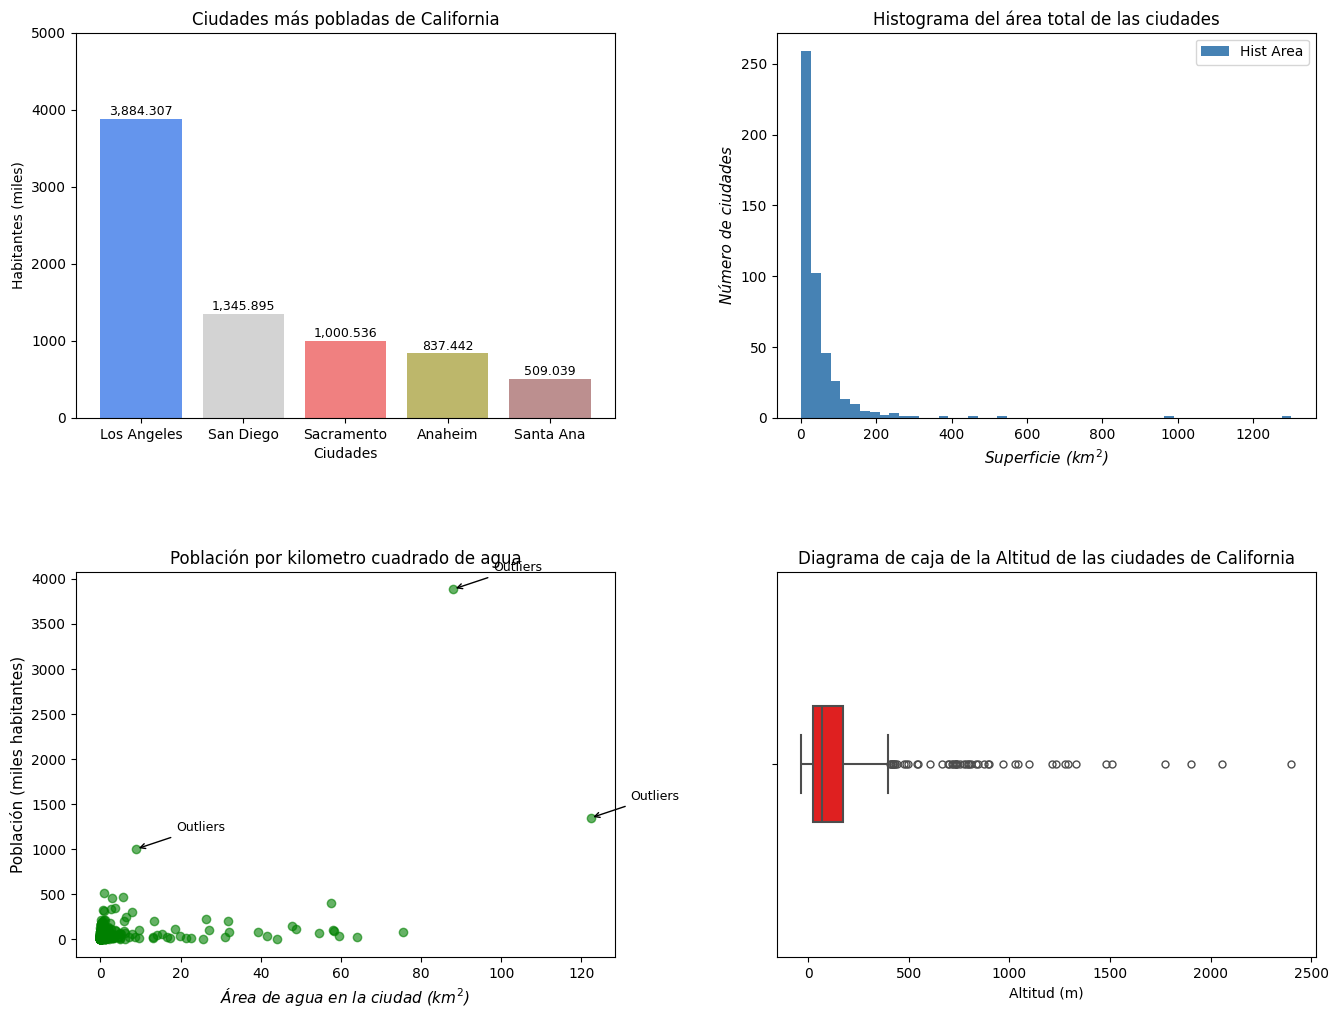

In [7]:
# Crear figura combinada 2x2 con los gráficos ya ajustados
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Ciudades más pobladas
top_cities = df.sort_values(by="population_total", ascending=False).head(5).copy()
top_cities["population_miles"] = top_cities["population_total"] / 1000
city_labels = ["Los Angeles", "San Diego", "Sacramento", "Anaheim", "Santa Ana"]
colors = ['cornflowerblue', 'lightgray', 'lightcoral', 'darkkhaki', 'rosybrown']
bars = axs[0, 0].bar(city_labels, top_cities["population_miles"], color=colors)
for bar, value in zip(bars, top_cities["population_miles"]):
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2,
                   value + 50,
                   f"{value:,.3f}",
                   ha="center", fontsize=9)
axs[0, 0].set_title("Ciudades más pobladas de California")
axs[0, 0].set_ylabel("Habitantes (miles)")
axs[0, 0].set_xlabel("Ciudades")
axs[0, 0].set_ylim(0, 5000)

# 2. Histograma de área total
axs[0, 1].hist(df["area_total_km2"], bins=50, color='steelblue', label='Hist Area')
axs[0, 1].set_title("Histograma del área total de las ciudades")
axs[0, 1].set_xlabel("Superficie ($km^2$)", fontsize=11, style='italic')
axs[0, 1].set_ylabel("Número de ciudades", fontsize=11, style='italic')
axs[0, 1].legend()

# 3. Scatter con outliers
df_plot = df[df["area_water_km2"] > 0].copy()
df_plot["population_miles"] = df_plot["population_total"] / 1000
axs[1, 0].scatter(df_plot["area_water_km2"], df_plot["population_miles"],
                  color='green', alpha=0.6)
axs[1, 0].set_title("Población por kilometro cuadrado de agua")
axs[1, 0].set_xlabel("Área de agua en la ciudad ($km^2$)", fontsize=11, style='italic')
axs[1, 0].set_ylabel("Población (miles habitantes)", fontsize=11)
outliers = df_plot[df_plot["population_miles"] > 1000]
for _, row in outliers.iterrows():
    axs[1, 0].annotate("Outliers",
                       xy=(row["area_water_km2"], row["population_miles"]),
                       xytext=(row["area_water_km2"] + 10, row["population_miles"] + 200),
                       arrowprops=dict(arrowstyle='->'),
                       fontsize=9)

# 4. Boxplot de altitud
sns.boxplot(x=df["elevation_m"],
            ax=axs[1, 1],
            color='red',
            width=0.3,
            fliersize=5,
            linewidth=1.5)
axs[1, 1].set_title("Diagrama de caja de la Altitud de las ciudades de California")
axs[1, 1].set_xlabel("Altitud (m)")

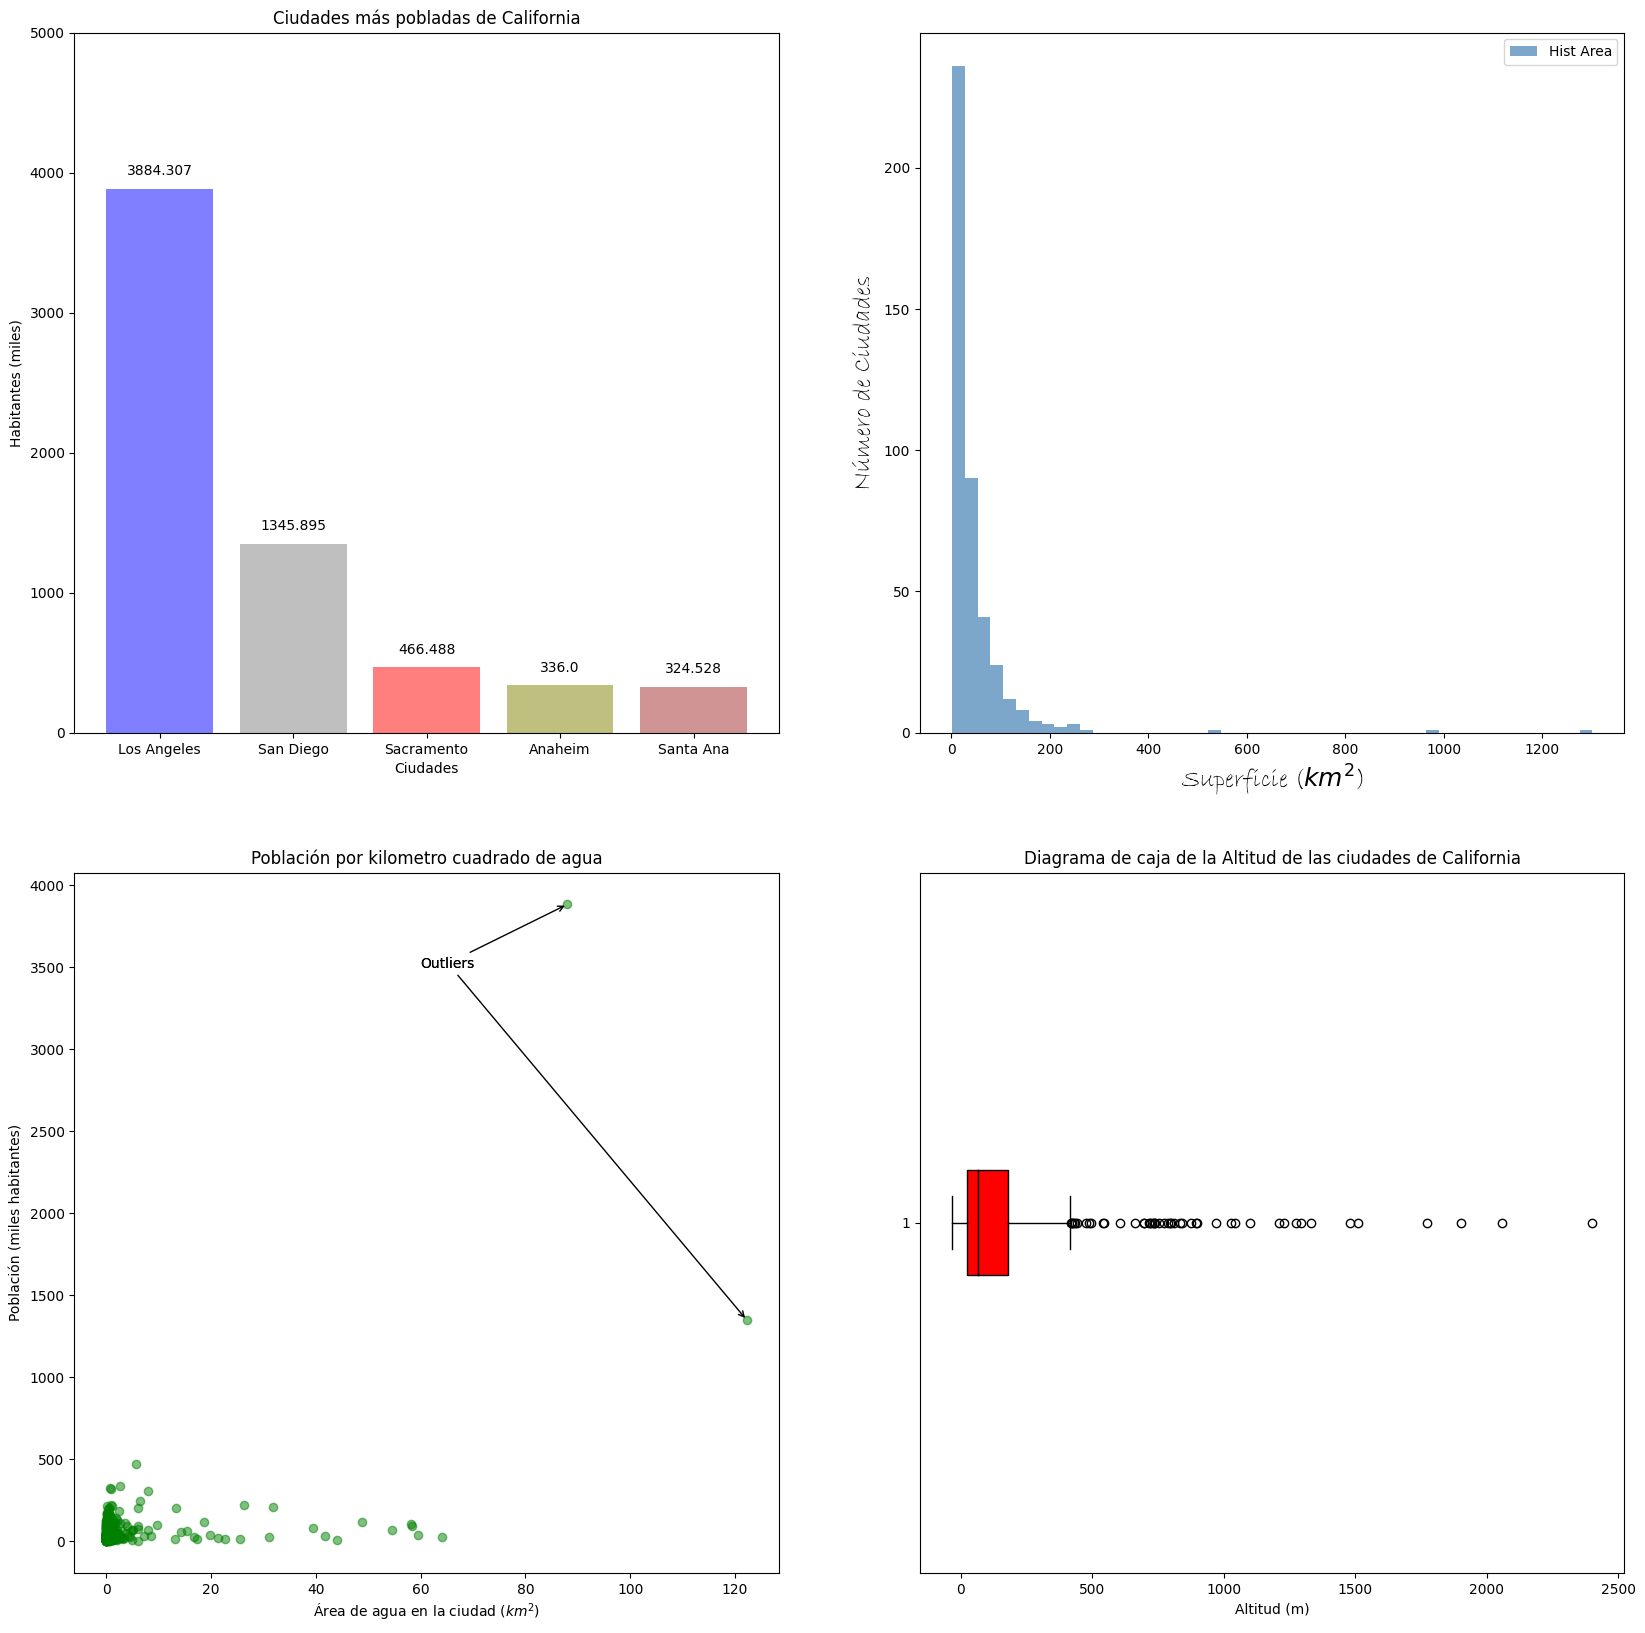

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [8]:
fig.savefig("./grafico_california_cities.png")

PermissionError: [Errno 13] Permission denied: './grafico_california_cities.png'